<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyze-single-cell-tracks" data-toc-modified-id="Analyze-single-cell-tracks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyze single cell tracks</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Setup</a></span></li></ul></li><li><span><a href="#Analyse-single-data-set" data-toc-modified-id="Analyse-single-data-set-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Analyse single data set</a></span><ul class="toc-item"><li><span><a href="#Plot-cell-tracks" data-toc-modified-id="Plot-cell-tracks-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Plot cell tracks</a></span></li><li><span><a href="#Net-displacement-angle" data-toc-modified-id="Net-displacement-angle-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Net displacement angle</a></span></li><li><span><a href="#Number-of-cell-tracks-over-time" data-toc-modified-id="Number-of-cell-tracks-over-time-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Number of cell tracks over time</a></span></li><li><span><a href="#MSD" data-toc-modified-id="MSD-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>MSD</a></span></li><li><span><a href="#Compute-speed-and-persistence" data-toc-modified-id="Compute-speed-and-persistence-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Compute speed and persistence</a></span></li><li><span><a href="#Instantaneous-speeds" data-toc-modified-id="Instantaneous-speeds-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Instantaneous speeds</a></span></li><li><span><a href="#Persistence" data-toc-modified-id="Persistence-1.1.7"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span>Persistence</a></span></li><li><span><a href="#Velocity-autocorrelation-function" data-toc-modified-id="Velocity-autocorrelation-function-1.1.8"><span class="toc-item-num">1.1.8&nbsp;&nbsp;</span>Velocity autocorrelation function</a></span></li><li><span><a href="#Pairwise-distances" data-toc-modified-id="Pairwise-distances-1.1.9"><span class="toc-item-num">1.1.9&nbsp;&nbsp;</span>Pairwise distances</a></span><ul class="toc-item"><li><span><a href="#Nearest-neighbour-distances" data-toc-modified-id="Nearest-neighbour-distances-1.1.9.1"><span class="toc-item-num">1.1.9.1&nbsp;&nbsp;</span>Nearest neighbour distances</a></span></li></ul></li><li><span><a href="#Spatial-correlations" data-toc-modified-id="Spatial-correlations-1.1.10"><span class="toc-item-num">1.1.10&nbsp;&nbsp;</span>Spatial correlations</a></span></li></ul></li></ul></li></ul></div>

# Analyze single cell tracks

Analyze cell motility for the BAPN E14.0 images, which seem to show aberrant cell motion. Input data consists of manually tracked xy-positions of individual cells.

### Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from math import ceil
import seaborn as sns

# For significance analysis
from scipy import stats
import statsmodels as sm
from statsmodels.formula.api import ols

cwd = os.getcwd(); print("Working dir: " + cwd)

folder_figures = "/Users/dang/Documents/Projects/Tabler_skull/Figures/temp/";
im_label = "Cell_tracks_analyzed_"

Working dir: /Users/dang/Documents/Projects/Tabler_skull/Scripts/Scripts_python


Images for cell tracking:
* /Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/211223 BAPN E14.0 live imaging/MaxProjected_Stitched_dataset_flipped.tif
* /Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/221114 BAPN E14.0 live imaging/originals/MaxProjected_Stitched_1_TiffConverted.tif

## Analyse single data set

In [145]:
video_label = "BAPN_E14.0_221114";
pix_per_micron = 3.376; # Number of pixels per micron
video_image_size = [1158.77, 1128.85]; # in microns
delta_t = 1/6; # time interval between slices in hrs


In [146]:
data_path = "/Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/221114 BAPN E14.0 live imaging/cell_tracks/"
# fname = "3a_ROIs_bulk_points.csv"
fname = "3b_ROIs_front_points.csv"
# fname = "4_highly_motile_cells_points.csv"
data_label = os.path.join(video_label, fname)
print(data_label)

loaded_data = pd.read_csv(os.path.join(data_path, fname))
loaded_data

BAPN_E14.0_221114/3b_ROIs_front_points.csv


,Nr,TID,PID,x [micron],y [micron],t [min],I [val],Len [micron],D2S [micron],D2R [micron],D2P [micron],v [micron/min],α [deg],Δα [deg]
0,1,1,1,472.502,607.573,0,1002,0.000,0.000,NaN,NaN,NaN,NaN,NaN
1,2,1,2,472.305,607.771,10,1083,0.279,0.279,NaN,0.279,0.028,135.000,NaN
2,3,1,3,472.305,607.968,20,1162,0.477,0.442,NaN,0.197,0.020,90.000,-45.000
3,4,1,4,473.292,608.166,30,1148,1.484,0.987,NaN,1.007,0.101,11.310,-78.690
4,5,1,5,473.292,609.350,40,1119,2.668,1.945,NaN,1.185,0.118,90.000,78.690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,20,18,461.197,556.576,170,1141,14.747,8.561,NaN,1.397,0.140,-57.995,39.130
881,882,20,19,461.641,555.835,180,1250,15.611,9.368,NaN,0.864,0.086,-59.036,-1.042
882,883,20,20,462.234,555.984,190,1164,16.221,9.746,NaN,0.611,0.061,14.036,73.072
883,884,20,21,462.826,555.095,200,1618,17.289,10.756,NaN,1.068,0.107,-56.310,-70.346


In [147]:
# Filter data
# remove cells
if data_label=='BAPN_E14.0_221114/3a_ROIs_bulk_points.csv':
    loaded_data = loaded_data.loc[~loaded_data.loc[:, 'TID'].isin([17, 18]), :]

# remove bad time point
# loaded_data = loaded_data.loc[ loaded_data.loc[:, 't [min]']!=550, :]
# loaded_data.loc[ loaded_data.loc[:, 't [min]']==550, :]

loaded_data

,Nr,TID,PID,x [micron],y [micron],t [min],I [val],Len [micron],D2S [micron],D2R [micron],D2P [micron],v [micron/min],α [deg],Δα [deg]
0,1,1,1,472.502,607.573,0,1002,0.000,0.000,NaN,NaN,NaN,NaN,NaN
1,2,1,2,472.305,607.771,10,1083,0.279,0.279,NaN,0.279,0.028,135.000,NaN
2,3,1,3,472.305,607.968,20,1162,0.477,0.442,NaN,0.197,0.020,90.000,-45.000
3,4,1,4,473.292,608.166,30,1148,1.484,0.987,NaN,1.007,0.101,11.310,-78.690
4,5,1,5,473.292,609.350,40,1119,2.668,1.945,NaN,1.185,0.118,90.000,78.690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,20,18,461.197,556.576,170,1141,14.747,8.561,NaN,1.397,0.140,-57.995,39.130
881,882,20,19,461.641,555.835,180,1250,15.611,9.368,NaN,0.864,0.086,-59.036,-1.042
882,883,20,20,462.234,555.984,190,1164,16.221,9.746,NaN,0.611,0.061,14.036,73.072
883,884,20,21,462.826,555.095,200,1618,17.289,10.756,NaN,1.068,0.107,-56.310,-70.346


In [148]:
N_cells = len(np.unique(loaded_data['TID']))
#N_slices = len(np.unique(loaded_data["t [min]"]))+1
N_slices = int(np.max(loaded_data["t [min]"])/10)+1

In [149]:
# Extract X and Y coordinates for each cell
X_all = np.nan*np.zeros([N_cells, N_slices]);
Y_all = np.nan*np.zeros([N_cells, N_slices]);
tracks_all = np.unique(loaded_data.TID); # Cell track numbers

for i in range(len(tracks_all)):
    track = tracks_all[i];
    
    # select cell i
    data_cell_i = loaded_data.loc[loaded_data.TID == track];
    slices_cell_i = list(map(int, data_cell_i['t [min]'].values/10))

    # store data
    X_all[i, slices_cell_i] = data_cell_i['x [micron]'];
    Y_all[i, slices_cell_i] = data_cell_i['y [micron]']; 

# correct bad time point
if video_label=='BAPN_E14.0_221114':
    X_all[:, 55] = X_all[:, 55]+25 # manually determined correction factor


In [150]:
# For plotting:
t_all = np.sort(np.unique(loaded_data["t [min]"]))/60; # times in hours
Nt = t_all.size; # number of time points

# time range to plot
t_lower = 0; # starting time in hrs
t_upper = 12; # final time in hrs
slice_range = np.arange(t_lower*6, t_upper*6+1); # hours*6
#slice_range = range(Nslices) #full range

# colors for categories
#colors_cats = ['gray', 'pink', 'black'];
colors_cats = [(0, 0, 0),  (1/3, 1/3, 1/3), (2/3, 2/3, 2/3)];

# system default colors
prop_cycle = plt.rcParams['axes.prop_cycle']
def_colors = prop_cycle.by_key()['color'];

In [151]:
# Check for nan values in the middle of tracks (this can be annoying downstream)
#np.array(list(map( np.where, np.isnan(X_all))))
#tmp=[np.where(np.isnan(X_all[i, :])) for i in range(N_cells)]
print('Frames with missing tracks:')
for i in range(N_cells):
    print('cell ', i+1)
    tmp=np.where(np.isnan(X_all[i, :]))[0]
    tmp1=np.where(np.ediff1d(tmp)>1)[0]; 
    if tmp1.size>0:
        print(tmp[:tmp1[-1]+1]+1)
    else:
        print('None')

Frames with missing tracks:
cell  1
None
cell  2
None
cell  3
None
cell  4
None
cell  5
None
cell  6
None
cell  7
None
cell  8
None
cell  9
None
cell  10
None
cell  11
None
cell  12
None
cell  13
None
cell  14
None
cell  15
None
cell  16
None
cell  17
None
cell  18
None
cell  19
None
cell  20
None


### Plot cell tracks
Note: repaired "broken" tracks by padding the values by the values just before the nan appearance.

In [152]:
# pre-process data
X_all_plot = X_all.copy()
Y_all_plot = Y_all.copy()

# remove bad time points if applicable
# if video_label=='BAPN_E14.0_221114':
#     X_all_plot[:, 55] = np.nan*np.ones(N_cells)
#     Y_all_plot[:, 55] = np.nan*np.ones(N_cells)

# get initial and final times
initial_times = list(map(lambda x: np.min(np.where(x)), ~np.isnan(X_all_plot)))
final_times = list(map(lambda x: np.max(np.where(x)), ~np.isnan(X_all_plot)))

# pad nan values before end of track with previous values of 
for i in range(N_cells):
    X_temp = X_all_plot[i, initial_times[i]:final_times[i]];
    Y_temp = Y_all_plot[i, initial_times[i]:final_times[i]];

    while (np.where(np.isnan(X_temp))[0].size>0) | (np.where(np.isnan(Y_temp))[0].size>0):
        X_temp[ np.where(np.isnan(X_temp)) ] = X_temp[ np.where(np.isnan(X_temp))[0]-1 ]
        Y_temp[ np.where(np.isnan(Y_temp)) ] = Y_temp[ np.where(np.isnan(Y_temp))[0]-1 ]
        
    X_all_plot[i, initial_times[i]:final_times[i]] = X_temp
    Y_all_plot[i, initial_times[i]:final_times[i]] = Y_temp
    
# select cells to plot
#cell_slice = np.arange(15)
cell_slice = np.arange(N_cells)
X_all_plot = X_all_plot[cell_slice, :]
Y_all_plot = Y_all_plot[cell_slice, :]

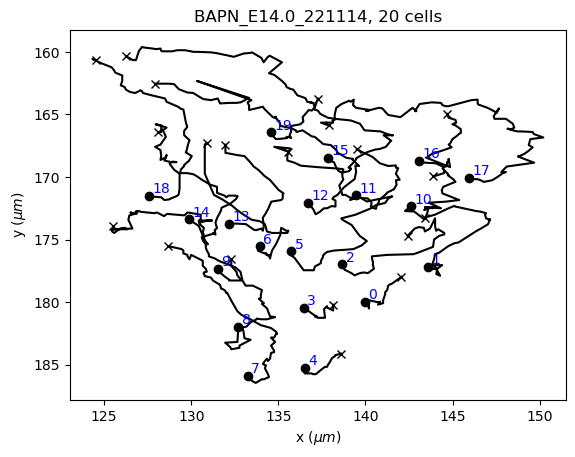

In [153]:
# plot 
fig, ax = plt.subplots(dpi=100)

# plot tracks
#ax.plot(X_all_plot[:, slice_range].T/pix_per_micron, Y_all_plot[:, slice_range].T/pix_per_micron, color=colors_cats[0]);
ax.plot(X_all_plot[:, :].T/pix_per_micron, Y_all_plot[:, :].T/pix_per_micron, color=colors_cats[0]);

# plot initial position (o) and final position (x)
initial_times = list(map(lambda x: np.min(np.where(x)), ~np.isnan(X_all_plot)))
final_times = list(map(lambda x: np.max(np.where(x)), ~np.isnan(X_all_plot)))

toffset = 0.2
# for i in range(N_cells):
#     ax.plot(X_all_plot[i, initial_times[i]].T/pix_per_micron, Y_all_plot[i, initial_times[i]].T/pix_per_micron, 'o', color=colors_cats[0]);
#     ax.plot(X_all_plot[i, final_times[i]].T/pix_per_micron, Y_all_plot[i, final_times[i]].T/pix_per_micron, 'x', color=colors_cats[0]);
#     ax.text(X_all_plot[i, initial_times[i]].T/pix_per_micron+toffset, Y_all_plot[i, initial_times[i]].T/pix_per_micron-toffset, str(i), color='b');
for i in range(len(cell_slice)):
    ax.plot(X_all_plot[i, initial_times[i]].T/pix_per_micron, Y_all_plot[i, initial_times[i]].T/pix_per_micron, 'o', color=colors_cats[0]);
    ax.plot(X_all_plot[i, final_times[i]].T/pix_per_micron, Y_all_plot[i, final_times[i]].T/pix_per_micron, 'x', color=colors_cats[0]);
    ax.text(X_all_plot[i, initial_times[i]].T/pix_per_micron+toffset, Y_all_plot[i, initial_times[i]].T/pix_per_micron-toffset, str(cell_slice[i]), color='b');
#     ax.plot(X_all_plot[cell_i, initial_times[cell_i]].T/pix_per_micron, Y_all_plot[cell_i, initial_times[cell_i]].T/pix_per_micron, 'o', color=colors_cats[0]);
#     ax.plot(X_all_plot[cell_i, final_times[cell_i]].T/pix_per_micron, Y_all_plot[cell_i, final_times[cell_i]].T/pix_per_micron, 'x', color=colors_cats[0]);
#     ax.text(X_all_plot[cell_i, initial_times[cell_i]].T/pix_per_micron+toffset, Y_all_plot[cell_i, initial_times[cell_i]].T/pix_per_micron-toffset, str(cell_i), color='b');
    
ax.invert_yaxis()

this_title = '{}, {} cells'.format(video_label, str(N_cells));
this_size = video_image_size;
ax.set(xlabel='x ($\\mu m$)', ylabel='y ($\\mu m$)', title=this_title) #, xlim=[0, this_size[0]], ylim=[0, this_size[1]])

plt.subplots_adjust(hspace=0.5, wspace=0.3)

# ---- Legend ----
# for row in range(2):
#     for i, this_label in enumerate(names_compare):
#         axs[row, 2].plot(np.nan, label=this_label, color=colors_cats[i])
#     axs[row, 2].legend(loc='upper left')
#     axs[row, 2].axis('off')
    
plt.show()

/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_4163/3521071956.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


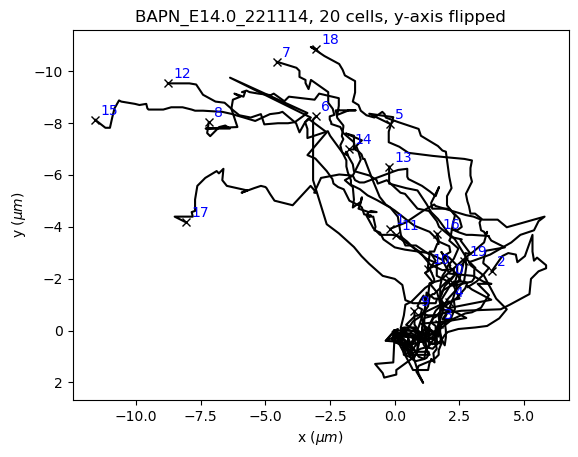

In [154]:
# relative displacements
X_all_plot_rel = np.array([X_all_plot[i, :] - X_all_plot[i, initial_times[i]] for i in range(N_cells)])
Y_all_plot_rel = np.array([Y_all_plot[i, :] - Y_all_plot[i, initial_times[i]] for i in range(N_cells)])

fig, ax = plt.subplots(dpi=100)
ax.plot(X_all_plot_rel[:, :].T/pix_per_micron, Y_all_plot_rel[:, :].T/pix_per_micron, color=colors_cats[0]);
for i in range(len(cell_slice)):
    ax.plot(X_all_plot_rel[i, final_times[i]].T/pix_per_micron, Y_all_plot_rel[i, final_times[i]].T/pix_per_micron, 'x', color=colors_cats[0]);
    ax.text(X_all_plot_rel[i, final_times[i]].T/pix_per_micron+toffset, Y_all_plot_rel[i, final_times[i]].T/pix_per_micron-toffset, str(cell_slice[i]), color='b');

ax.invert_yaxis()

this_title = '{}, {} cells, y-axis flipped'.format(video_label, str(N_cells));
this_size = video_image_size;
ax.set(xlabel='x ($\\mu m$)', ylabel='y ($\\mu m$)', title=this_title)
fig.show()

### Net displacement angle

In [155]:
# compute polar coordinates
X_rel_all = np.array([X_all[i, final_times[i]]-X_all[i, initial_times[i]] for i in range(N_cells)])
Y_rel_all = np.array([Y_all[i, final_times[i]]-Y_all[i, initial_times[i]] for i in range(N_cells)]) 

# flip y axis?
flip_y = True
if flip_y:
    Y_rel_all = -Y_rel_all
    
r_all = np.sqrt(X_rel_all**2 + Y_rel_all**2 )
theta_all = np.arctan2(Y_rel_all, X_rel_all)

# bin angle data
Nbins = 8
theta_bins = np.arange(-np.pi, np.pi+0.001, 2*np.pi/(Nbins))
theta_hist = np.histogram(theta_all, theta_bins  )[0]
bincenters = np.array([(theta_bins[i]+theta_bins[i+1])/2 for i in range(theta_bins.size-1)])

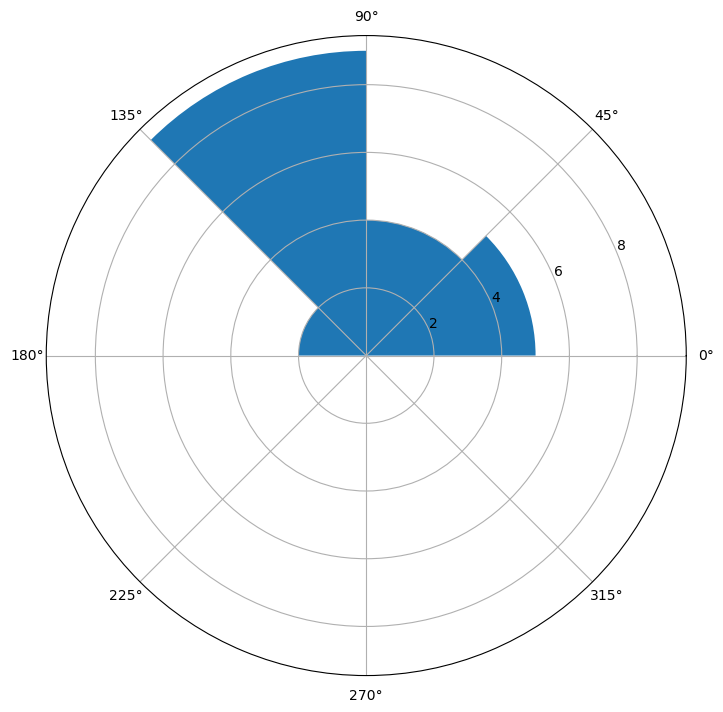

In [156]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
width = 2*np.pi/Nbins
bars = ax.bar(bincenters, theta_hist, width=width, bottom=0.0)
# for r,bar in zip(theta_hist, bars):
#     bar.set_alpha(0.5)

plt.show()

### Number of cell tracks over time

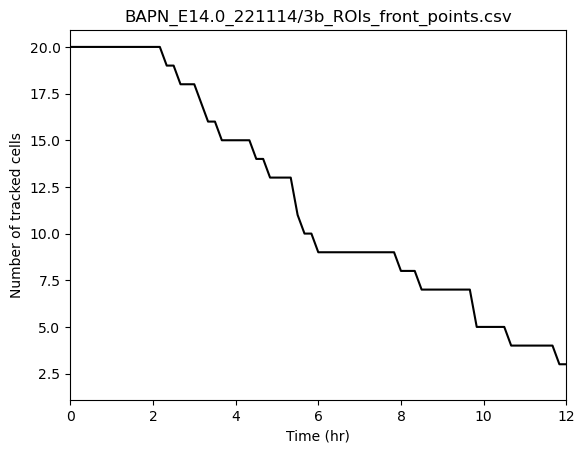

In [157]:
# plot 
fig, ax = plt.subplots(dpi=100)
N_tracked_cells_vs_t = np.sum(~np.isnan(X_all), axis=0);

ax.plot(t_all, N_tracked_cells_vs_t, color=colors_cats[0])
this_title = data_label
ax.set(xlabel='Time (hr)', ylabel='Number of tracked cells', title=this_title, xlim=[t_lower, t_upper])
#ax.set(xlim=[t_lower, t_upper], ylim = [0, 60])
        
plt.subplots_adjust(hspace=0.5, wspace=0.3)

### MSD

In [158]:
# Compute MSD
# deal with tracks that start with nan
t0_all = np.array(list(map(lambda x: np.argmax(~np.isnan(x)), X_all ))) # initial times of cell tracks
t0_all

# np.sqrt( (X-X[t])**2 + (Y-Y[t])**2)
MSD_all = np.array(list(map( lambda X, Y, t0: (X-X[t0])**2 + (Y-Y[t0])**2, X_all, Y_all, t0_all)))/pix_per_micron**2; # units: microns^2
MSD_all

# trim nan at start
MSD_all_trimmed = [MSD[~np.isnan(MSD)] for MSD in MSD_all]

# convert to np array and calc mean
MSD_all_trimmed_np = np.ones([N_cells, Nt])*np.nan
for i in range(N_cells):
    MSD_all_trimmed_np[i, :len(MSD_all_trimmed[i])] = MSD_all_trimmed[i]

MSD_trimmed_np = np.nanmean(MSD_all_trimmed_np, axis=0)
MSD_trimmed_np_std = np.nanstd(MSD_all_trimmed_np, axis=0)


In [159]:
# Fit power law to MSD
x_data = np.log(t_all[1:])
y_data = np.log(MSD_trimmed_np[1:])

import statsmodels.api as sm
x_data = sm.add_constant(x_data)
model = sm.OLS(y_data, x_data)
results = model.fit()

print('Fit parameters:', results.params )
print('MSD ~ t^alpha, alpha =', np.round( results.params[1], 3) )

Fit parameters: [0.4170454  1.72614844]
MSD ~ t^alpha, alpha = 1.726


/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_4163/4174532410.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


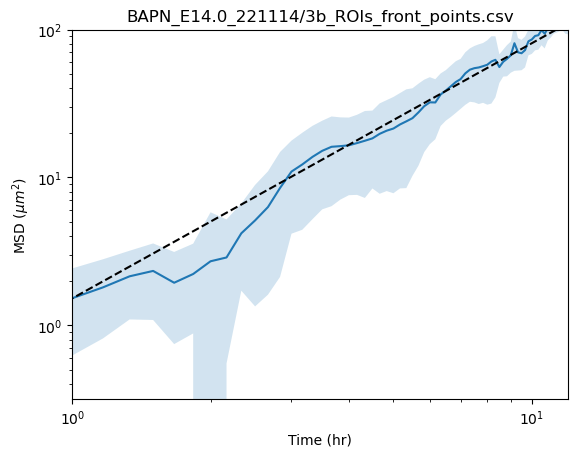

In [160]:
# MSD with error = standard deviation
fig, ax = plt.subplots(dpi=100)

ax.plot(t_all, MSD_trimmed_np, '-' )
ax.fill_between(t_all, MSD_trimmed_np-MSD_trimmed_np_std,  MSD_trimmed_np+MSD_trimmed_np_std, alpha=0.2)
#ax.plot(t_all, results.params[0]+results.params[1]*t_all, 'k--' )
ax.plot(t_all, np.exp(results.params[0])*(t_all**results.params[1]), 'k--' )

# plot ballistic (~t^2) and diffusive (~t) scaling
times_plot = np.arange(t_lower, t_upper, 0.1) #np.array([t_lower, t_upper])
#ax.plot(times_plot, MSD_trimmed_np[int(1/delta_t)]*times_plot, '--', color=(0.2, 0.2, 0.4) ) # diffusive
#ax.plot(times_plot, MSD_trimmed_np[int(1/delta_t)]*(times_plot**2), '--', color=(0.2, 0.4, 0.2) ) # ballistic

ax.set(xlabel='Time (hr)', ylabel='MSD ($\\mu m^2$)', title=this_title, 
      xscale='log', yscale='log', xlim=[1, t_upper], ylim=[10**(-0.5), 10**(2)])
fig.show()

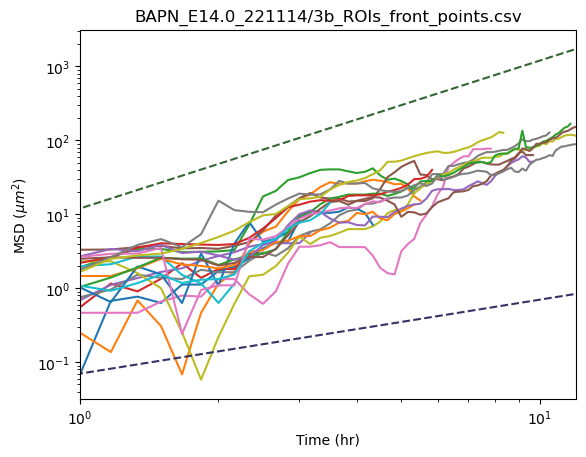

In [161]:
# Individual cells - squared displacements
#MSD_all = np.array(list(map( lambda X, Y, t0: (X-X[0])**2 + (Y-Y[0])**2), X_all, Y_all))/pix_per_micron; # units: microns^2

fig, ax = plt.subplots(dpi=100)
for i in range(len(MSD_all_trimmed)):
    MSD_all = MSD_all_trimmed[i];
    ax.plot(t_all[:len(MSD_all)], MSD_all )

this_title = data_label
ax.set(xlabel='Time (hr)', ylabel='MSD ($\\mu m^2$)', title=this_title, 
      xscale='log', yscale='log', xlim=[1, t_upper], ylim=[10**(-1.5), 10**(3.5)])

# plot ballistic (~t^2) and diffusive (~t) scaling
times_plot = np.arange(t_lower, t_upper, 0.1) #np.array([t_lower, t_upper])
ax.plot(times_plot, 0.07*times_plot, '--', color=(0.2, 0.2, 0.4) ) # diffusive
ax.plot(times_plot, 12*(times_plot**2), '--', color=(0.2, 0.4, 0.2) ) # ballistic

#ax.set_xscale('log')
plt.show()

### Compute speed and persistence

In [162]:
# compute <v>_{cells}(t)
delta_x_all = np.array(list(map(np.ediff1d, X_all)))
delta_y_all = np.array(list(map(np.ediff1d, Y_all)))
delta_v_all = np.sqrt(delta_x_all**2+delta_y_all**2)/delta_t

v_vs_t = np.nanmean(delta_v_all, axis=0)
Nc_v_vs_t = np.sum(~np.isnan(delta_v_all), axis=0) # number of cells for computing v

# Directionality per time point, averaged over cells
cumdist = np.array(list(map( np.cumsum, np.sqrt(delta_x_all**2+delta_y_all**2) )))
currentdist = np.array([np.sqrt((X_all[i, 1:] - X_all[i, 0])**2 + (Y_all[i, 1:] - Y_all[i, 0])**2) for i in range(N_cells)])
directionality_vs_t = currentdist/cumdist
avg_directionality_vs_t = np.nanmean(directionality_vs_t, axis=0)


/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_4163/2513562853.py:12: RuntimeWarning: invalid value encountered in true_divide
  directionality_vs_t = currentdist/cumdist


In [163]:
# Results per cell, averaged over times
# get all cells and non-nan data
idx_cells, idx_times = np.where(~np.isnan(X_all) & ~np.isnan(Y_all))
this_cells = np.unique(idx_cells)

avg_v_all = np.zeros(this_cells.size)
directionality_all = np.zeros(this_cells.size)

for i in range(this_cells.size):
    cell_i = this_cells[i]
    #print(cell_i)
    
    # compute v for given cell 
    idx_times_i = np.where(idx_cells==cell_i)[0]

    #idx_cells[idx_times_i]
    #idx_times[idx_times_i] 
    # X_all[cell_i, idx_times[idx_times_i] ]
    # Y_all[cell_i, idx_times[idx_times_i] ] 
    
    # compute all speeds for cell  i
    delta_t_i = np.ediff1d( idx_times[idx_times_i]  )*1/6
    delta_x_i = np.ediff1d( X_all[cell_i, idx_times[idx_times_i]] )
    delta_y_i = np.ediff1d( Y_all[cell_i, idx_times[idx_times_i]] )
    v_i = np.sqrt(delta_x_i**2 + delta_y_i**2)/delta_t_i
    avg_v_all[i] = np.mean(v_i)
    
    # compute directionality for cell i
    total_dist_i = np.sum(np.sqrt(delta_x_i**2 + delta_y_i**2))
    directionality_all[i] = np.sqrt((X_all[cell_i, idx_times[np.max(idx_times_i)]] - X_all[cell_i, idx_times[np.min(idx_times_i)]])**2 + 
            (Y_all[cell_i, idx_times[np.max(idx_times_i)]] - Y_all[cell_i, idx_times[np.min(idx_times_i)]])**2)/total_dist_i


### Instantaneous speeds

/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_4163/2093363074.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


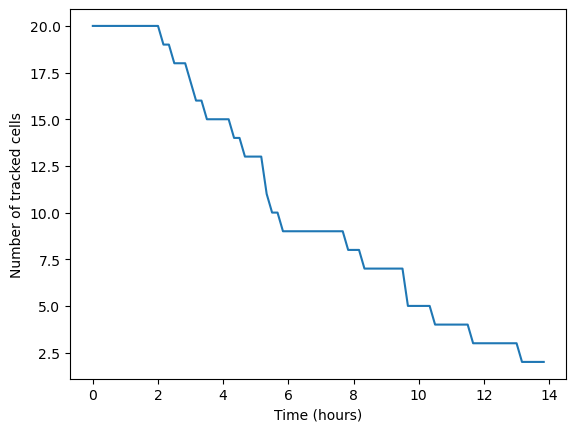

In [164]:
# number of cells with well-defined speeds
fig, ax = plt.subplots(dpi=100)
ax.plot(t_all[:-1], Nc_v_vs_t, '-')
ax.set(xlabel='Time (hours)', ylabel='Number of tracked cells')
fig.show()

/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_4163/3216259209.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


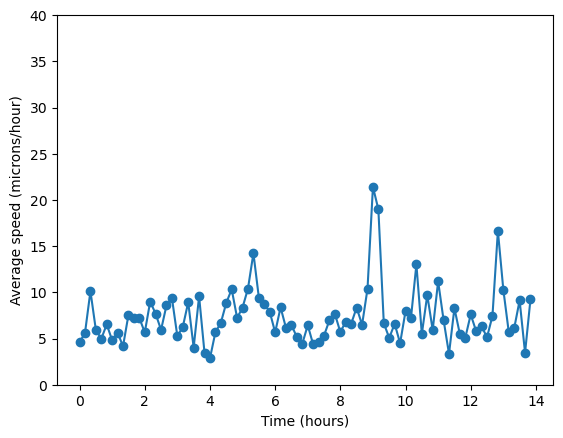

In [165]:
# average over cells, vs time
fig, ax = plt.subplots(dpi=100)
ax.plot(t_all[:-1], v_vs_t, 'o-')
ax.set(xlabel='Time (hours)', ylabel='Average speed (microns/hour)', ylim=(0, 40))
fig.show()

/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_4163/491736257.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[ 5.86665084  8.47555292  8.25390844  5.45403166  3.73875103  8.34958727
  6.39611062  5.57545274  7.2545444   5.78382303 10.2145457   6.12065662
  8.54278287  6.57652437  6.94433195  6.9565349   7.20211735  7.55828873
  6.93740846  5.63780079]


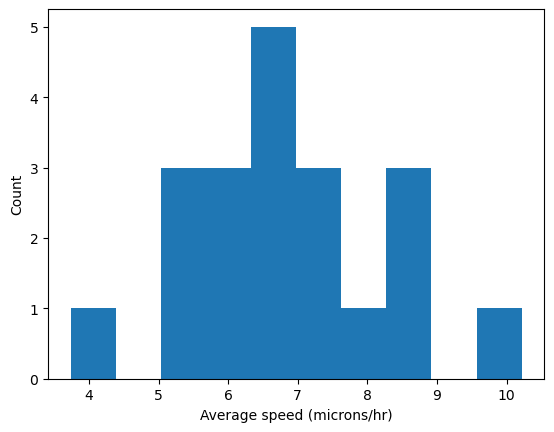

In [166]:
# average over times
print(avg_v_all)
fig, ax = plt.subplots(dpi=100)
ax.hist(avg_v_all)
ax.set(xlabel='Average speed (microns/hr)', ylabel='Count')
fig.show()

### Persistence 
Defined as d/D, where d is the distance between endpoints and D is the total path distance. This is also called directionality, or "Fraction of efficient movement". 

/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_4163/3071730693.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


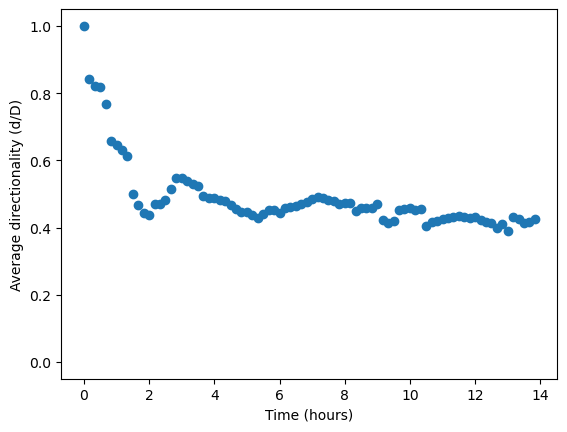

In [167]:
# average over cells, vs time
fig, ax = plt.subplots(dpi=100)
ax.plot(t_all[:-1], avg_directionality_vs_t, 'o')
ax.set(xlabel='Time (hours)', ylabel='Average directionality (d/D)', ylim=(-0.05,1.05))
fig.show()


/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_4163/4130491072.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


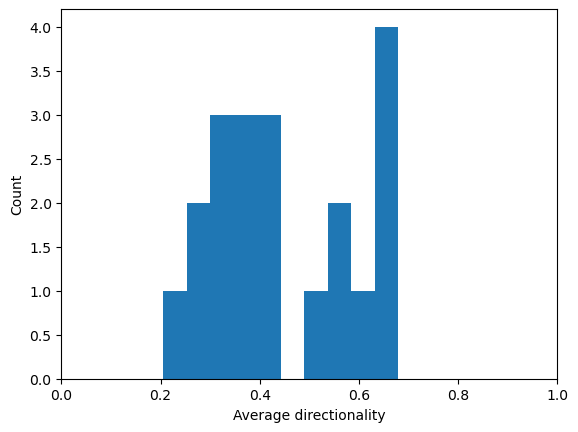

In [168]:
fig, ax = plt.subplots(dpi=100)

ax.hist(directionality_all)
ax.set(xlabel='Average directionality', ylabel='Count', xlim=(0,1) )
fig.show()

### Velocity autocorrelation function

The velocity autocorrelation function shows how cells maintain their velocity (speed and directionality) over time. The plots show the correlation between a specified initial time (e.g. t=0 hours) and all further times. The decay shows how well cells maintain their velocities over time. <br>
We normalize the velocities so that in the final plots we compare only directionality and not speed at different times.

<u>Technical notes</u> <br>
The velocity autocorrelation function is defined as $C_{VV}(t, t') = \langle v(t) v(t') \rangle$, 
where $\langle \ldots \rangle$ is an ensemble-average over all cells. <br>
Under time-invariance, $C_{VV}(t, t')$ would be a function of $|t-t'|$ only. However, for our system we expect the correlation to depend on both $t$ and $t'$, so choosing an apprioriate initial time to compare with is critical. 
Recall that $C_{VV}(t, t')$ decays exponentially for Brownian motion. <br>
Note that $C_{VV}(t, t')$ is unnormalized, but can be normalized to give Pearson correlation coefficients. We normalize by dividing all velocities by their norm, so that $|v(t)| = 1$ for all $t$.

In [169]:
# determine velocities
del_X_all = np.array(list(map(np.diff, X_all))); # X[t+1]-X[t] for all cells
del_Y_all = np.array(list(map(np.diff, Y_all))); # Y[t+1]-Y[t] for all cells
velocities_all = np.swapaxes( np.swapaxes( np.array([del_X_all, del_Y_all])/pix_per_micron, 0, 1), 1, 2); # units: microns
# velocities_all.shape

# calculate autocorrelation        
t_init=0
correlations_all = np.zeros([N_cells, N_slices-t_init-1])*np.nan;
normalize = True
for i_cell in range(velocities_all.shape[0]):  
    v_temp = velocities_all[i_cell]; # no normalization
    if normalize:
        norm = np.array(list(map(np.linalg.norm, v_temp))).reshape(len(v_temp), 1);
        v_temp = velocities_all[i_cell]/norm; # normalized velocities
    correlations_all[i_cell, :] = np.dot(v_temp[t_init:], v_temp[t_init]); # normalized

correlation_func = np.nanmean(correlations_all, axis=0);


/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_4163/1718664330.py:15: RuntimeWarning: invalid value encountered in true_divide
  v_temp = velocities_all[i_cell]/norm; # normalized velocities


[(0.0, 12.0), (-1.0, 1.0)]

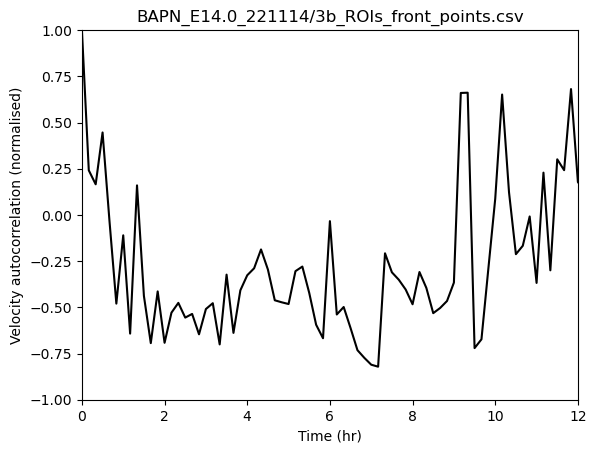

In [170]:
fig, ax = plt.subplots(dpi=100)
ax.plot(t_all[:-1], correlation_func, color=colors_cats[0])
this_title = data_label
if normalize:
    text2 = ' (normalised)'
else: 
    text2 = ''
ax.set(xlabel='Time (hr)', ylabel='Velocity autocorrelation'+text2, title=this_title);
ax.set(xlim=[t_lower, t_upper], ylim=[-1,1])

### Pairwise distances

In [171]:
# calculate all pairwise distances
from itertools import combinations

pairs = list(combinations(range(N_cells), 2)) # all pairs of values
distances_all = np.zeros([ len(pairs), X_all.shape[1] ])

def dist(x_all_1, y_all_1, x_all_2, y_all_2):
    return np.sqrt((x_all_1-x_all_2)**2+(y_all_1-y_all_2)**2)

for i in range(len(pairs)):
    distances_all[i, :] = dist( X_all[pairs[i][0]], Y_all[pairs[i][0]], X_all[pairs[i][1]], Y_all[pairs[i][1]] )

Text(0, 0.5, 'Separation (microns)')

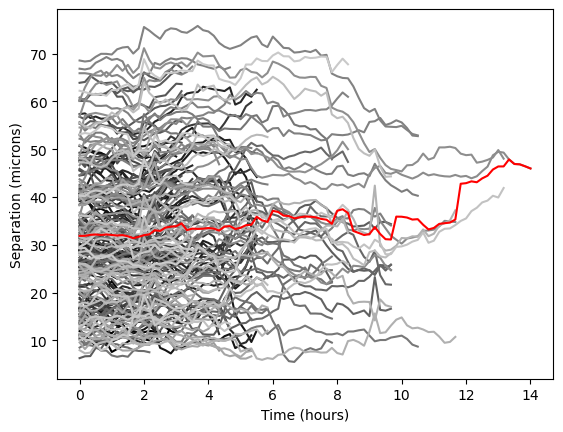

In [172]:
# Plot all distances
fig, ax = plt.subplots(dpi=100)

colors_all = np.array([0.8*i/Nt*np.array((1,1,1)) for i in range(Nt)])

# plot tracks
for i in range(len(pairs)):
    ax.plot(t_all, distances_all[i, :], color=0.8*i/len(pairs)*np.array((1,1,1)));
    
# plot average distance
avg_dist = np.nanmean(distances_all, axis=0)
ax.plot(t_all, avg_dist, color='red')

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Separation (microns)')


Red line = average

#### Nearest neighbour distances

In [173]:
# get rid of cells with initial position = nan
indcs_cells_nan = np.where(np.isnan( X_all[:, 0] ) | np.isnan(Y_all[:, 0] ) )[0]
cells_sel = ~np.isin(np.arange(N_cells), indcs_cells_nan)
cells_sel_idcs = np.where(cells_sel)[0]
N_cells_sel = np.sum(cells_sel)
#cell_idcs_sel

#pd.DataFrame(distances_all)
dist_initial_all = np.nan*np.ones([N_cells, N_cells])
for i in range(N_cells):
    if cells_sel[i]:
        dist_initial_all[i, :] = np.sqrt( (X_all[i, 0] - X_all[:, 0])**2 + (Y_all[i, 0] - Y_all[:, 0])**2 )

dist_initial_all[dist_initial_all==0] = np.nan
#dist_initial_all

# determine nearest neighbour of each cell
#nearest_nb_all = np.nanargmin(dist_initial_all, axis=1)
nearest_nb_all = np.nanargmin(dist_initial_all[cells_sel, :], axis=1)
#nearest_nb_all 

# calculate nn distances
#pairs_idcs = [np.where([(x==(i, nearest_nb_all[i])) | (x==(nearest_nb_all[i], i)) for x in pairs])[0][0] for i in range(N_cells)] # indices of nearest neighbour pairs in `pairs'
pairs_idcs = [np.where([(x==(cells_sel_idcs[i], nearest_nb_all[i])) | (x==(nearest_nb_all[i], cells_sel_idcs[i])) 
                        for x in pairs])[0][0] for i in range(N_cells_sel)] # indices of nearest neighbour pairs in `pairs'
nn_dist_all = distances_all[pairs_idcs, :]


In [174]:
# nearest neighbour pairs
pairs_np = np.array(pairs) 
print( pairs_np[pairs_idcs] )

[[ 0  2]
 [ 0  1]
 [ 2  5]
 [ 0  3]
 [ 4  7]
 [ 5  6]
 [ 5  6]
 [ 4  7]
 [ 7  8]
 [ 6  9]
 [10 11]
 [11 12]
 [11 12]
 [13 14]
 [13 14]
 [11 15]
 [16 17]
 [16 17]
 [14 18]
 [15 19]]


/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_4163/3846583619.py:11: RuntimeWarning: Mean of empty slice
  avg_dist = np.nanmean(nn_dist_all, axis=0)


Text(0, 0.5, 'Separation (microns)')

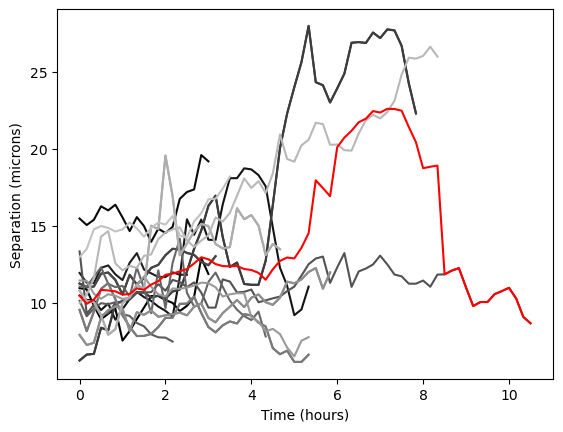

In [175]:
# Plot nearest neighbour distances
fig, ax = plt.subplots(dpi=100)

colors_all = np.array([0.8*i/Nt*np.array((1,1,1)) for i in range(Nt)])

# plot tracks
for i in range(N_cells_sel):
    ax.plot(t_all, nn_dist_all[i, :], color=0.8*i/N_cells*np.array((1,1,1)));
    
# plot average distance
avg_dist = np.nanmean(nn_dist_all, axis=0)
ax.plot(t_all, avg_dist, color='red')

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Separation (microns)')


### Spatial correlations

In [ ]:
# TO DO